In [ ]:
 # Build a system that can predict the type of forest cover using analysis data for a 30m x 30m
 # patch of land in the forest

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load dataset
df = pd.read_csv("C:/Users/Lenovo/OneDrive/Desktop/forest prediction.csv")

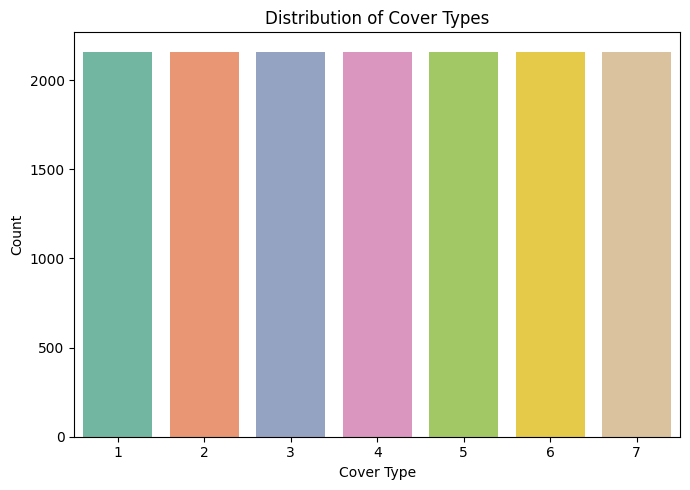

In [3]:
# EXPLORATORY DATA ANALYSIS 

# Target variable distribution
plt.figure(figsize=(7, 5))
sns.countplot(x='Cover_Type', data=df, palette='Set2')
plt.title('Distribution of Cover Types')
plt.xlabel('Cover Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

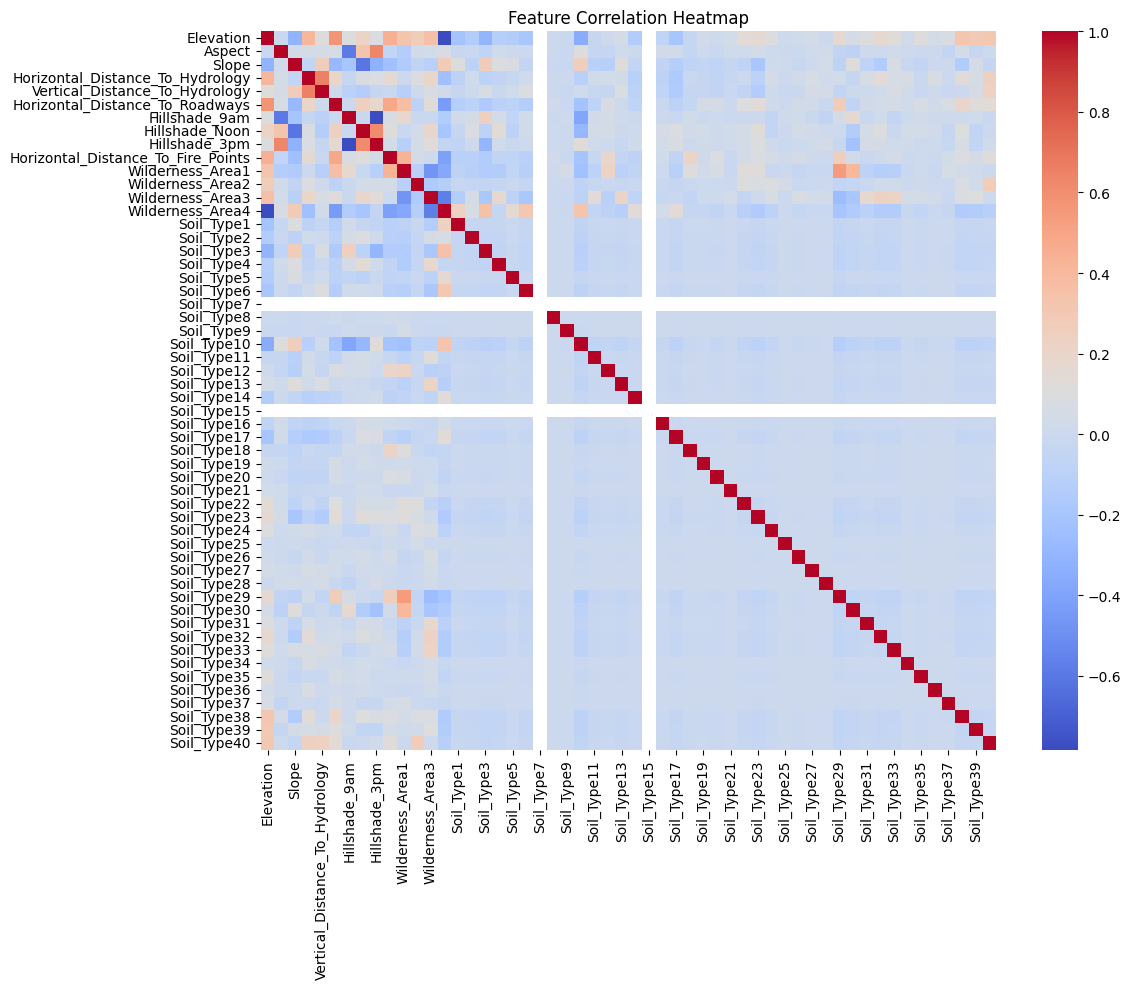

In [4]:
# Correlation heatmap for numerical features
plt.figure(figsize=(12, 10))
numeric_features = df.select_dtypes(include=['int64', 'float64']).drop(['Id', 'Cover_Type'], axis=1)
corr = numeric_features.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

In [5]:
# DATA PREPROCESSING 

X = df.drop(["Id", "Cover_Type"], axis=1)
y = df["Cover_Type"] - 1  # Adjust target to start from 0

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [6]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# MODEL TRAINING 
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
model.fit(X_train_scaled, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [8]:
# Prediction and evaluation
y_pred = model.predict(X_test_scaled)

In [9]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"\n🎯 Accuracy: {acc * 100:.2f}%")


🎯 Accuracy: 85.35%


In [10]:
# Classification report
print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred))


📊 Classification Report:

              precision    recall  f1-score   support

           0       0.77      0.74      0.76       432
           1       0.75      0.63      0.69       432
           2       0.83      0.82      0.83       432
           3       0.96      0.97      0.97       432
           4       0.87      0.95      0.91       432
           5       0.82      0.88      0.85       432
           6       0.94      0.98      0.96       432

    accuracy                           0.85      3024
   macro avg       0.85      0.85      0.85      3024
weighted avg       0.85      0.85      0.85      3024



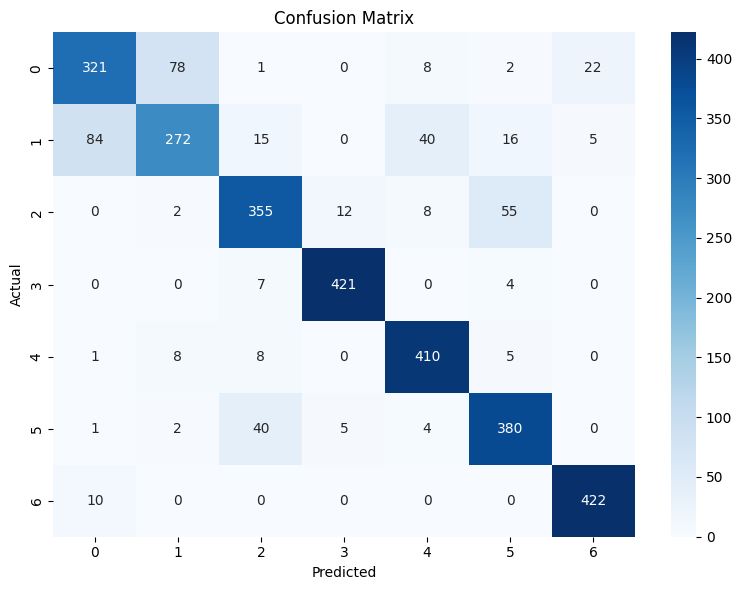

In [11]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

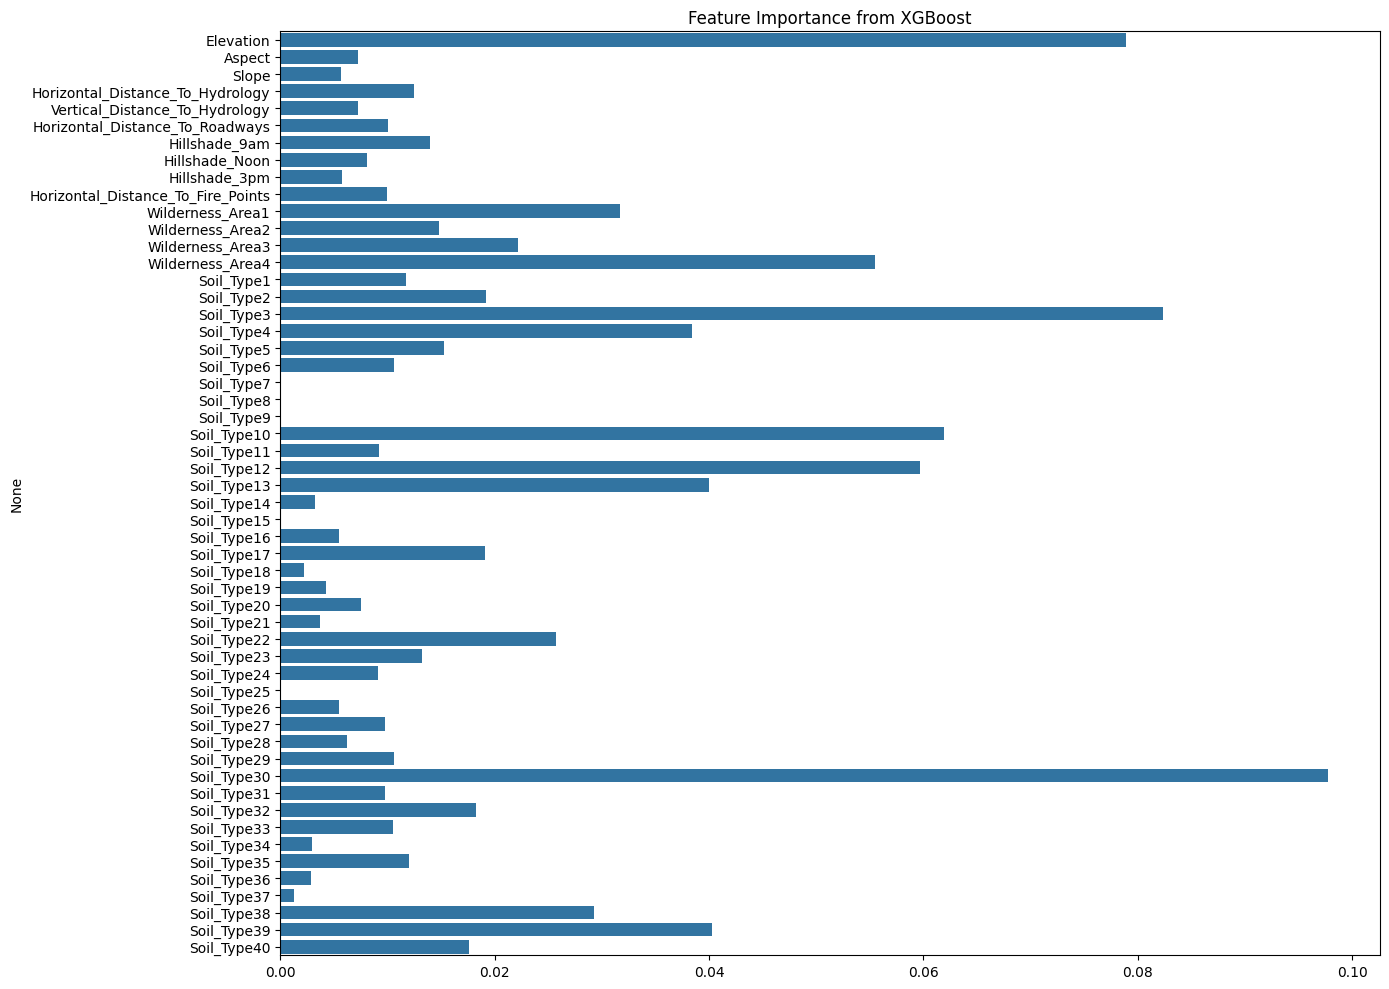

In [14]:
# Feature importance
plt.figure(figsize=(14, 10))
importance = model.feature_importances_
sns.barplot(x=importance, y=X.columns, orient='h')
plt.title("Feature Importance from XGBoost")
plt.tight_layout()
plt.show()